In [1]:
pwd

'd:\\online class\\DeepLearning\\Object Detection\\notebook'

In [124]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import cv2

import selectivesearch

import numpy as np

In [125]:
img = cv2.imread('test.jpg') #BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

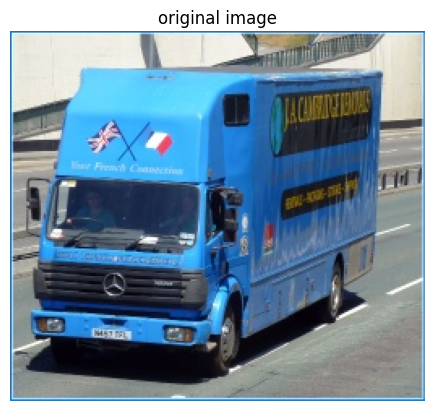

In [126]:
plt.imshow(img)
plt.axis('off')
plt.title('original image')
plt.show()

In [127]:
imgs, regions = selectivesearch.selective_search(img, scale=100, min_size=50)

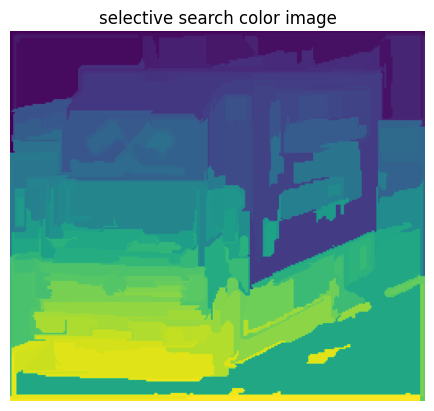

In [128]:
plt.imshow(imgs[:,:,3])
plt.axis('off') 
plt.title('selective search color image')
plt.show()
## harek level ko image ko region ko plot garna lai selective search kun kun region lai select garna lai use gareko xa visualize

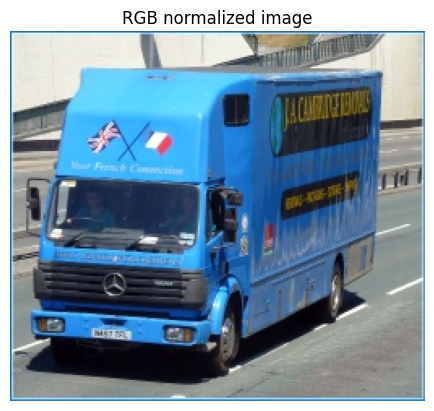

In [129]:
plt.imshow(imgs[:,:,:3] / img[:,:,:3].max()) # normalize garera plot gareko max value le divided garera
plt.axis('off') 
plt.title('RGB normalized image')
plt.show()

In [130]:
imgs[:,:,:3].max() 

255.0

In [131]:
len(regions) # total regions in the image ie total regions mathi rgb plot gareko image ko without label

400

In [132]:
regions[:10] # first 10 regions ko coordinates

[{'rect': (0, 0, 2, 74), 'size': 100, 'labels': [0.0]},
 {'rect': (3, 0, 85, 0), 'size': 86, 'labels': [1.0]},
 {'rect': (89, 0, 61, 0), 'size': 62, 'labels': [2.0]},
 {'rect': (151, 0, 104, 2), 'size': 108, 'labels': [3.0]},
 {'rect': (1, 1, 1, 47), 'size': 50, 'labels': [4.0]},
 {'rect': (3, 1, 76, 0), 'size': 77, 'labels': [5.0]},
 {'rect': (4, 1, 76, 46), 'size': 2168, 'labels': [6.0]},
 {'rect': (81, 1, 60, 15), 'size': 162, 'labels': [7.0]},
 {'rect': (142, 1, 47, 18), 'size': 433, 'labels': [8.0]},
 {'rect': (152, 1, 77, 19), 'size': 568, 'labels': [9.0]}]

In [133]:
def extract_candidates(img):
    _, regions = selectivesearch.selective_search(img, scale=100, min_size=50)
    candidates = []
    img_area = np.product(img.shape[:2])
    for region in regions:
        if region['size'] < (0.05 * img_area):
            continue
        if region['rect'] in candidates:
            continue
        if region['size'] > img_area:
            continue
        candidates.append(region['rect'])
    return candidates
extract_candidates(img)


C:\Users\uniqu\AppData\Local\Temp\ipykernel_44804\2230612193.py:14: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  extract_candidates(img)


[(4, 122, 248, 101),
 (32, 26, 126, 64),
 (144, 26, 84, 157),
 (3, 122, 249, 102),
 (144, 26, 109, 157),
 (26, 26, 132, 65),
 (2, 122, 250, 102),
 (2, 122, 250, 103),
 (144, 26, 110, 157),
 (1, 74, 113, 116),
 (1, 74, 132, 119),
 (1, 74, 146, 119),
 (26, 25, 162, 66),
 (10, 152, 189, 61),
 (144, 26, 110, 161),
 (1, 122, 251, 103),
 (0, 122, 252, 103),
 (38, 1, 191, 72),
 (38, 1, 217, 72),
 (2, 1, 253, 72),
 (0, 0, 255, 74),
 (1, 39, 148, 154),
 (0, 26, 254, 199),
 (0, 0, 255, 91),
 (1, 152, 198, 74),
 (1, 39, 198, 187),
 (0, 0, 255, 115),
 (0, 26, 255, 201),
 (0, 0, 255, 226),
 (0, 0, 255, 227)]

C:\Users\uniqu\AppData\Local\Temp\ipykernel_44804\3878486709.py:2: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  for bb in extract_candidates(img):


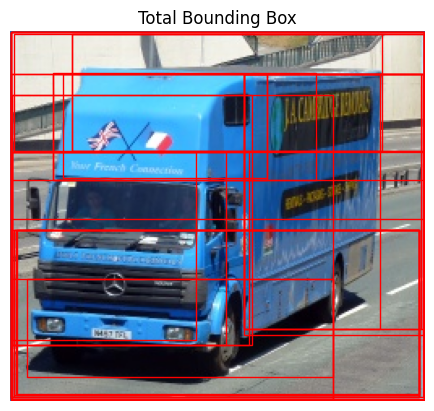

In [134]:
plt.imshow(img)
for bb in extract_candidates(img):
    # Create a rectangle patch using the bounding box coordinates
    # bb[:2] - Top-left corner points, bb[2] and bb[3] - Width and height
    rect = patches.Rectangle(bb[:2], bb[2], bb[3], linewidth=1, edgecolor='r', facecolor='None')
    # Add the rectangle patch to the current axes
    plt.gca().add_patch(rect)
plt.axis('off')
plt.title('Total Bounding Box')
plt.show()

In [135]:
# Function to find the minimum bounding box that encloses all rectangles
def combine_bounding_boxes(bboxes):
    if len(bboxes) == 0:
        return (0, 0, 0, 0)  # No bounding box found
    
    x_min = min([bb[0] for bb in bboxes])
    y_min = min([bb[1] for bb in bboxes])
    x_max = max([bb[0] + bb[2] for bb in bboxes])
    y_max = max([bb[1] + bb[3] for bb in bboxes])
    
    # Debugging: Print out the bounding box dimensions
    print(f"Bounding Box (x_min: {x_min}, y_min: {y_min}, x_max: {x_max}, y_max: {y_max})")
    
    return (x_min, y_min, x_max - x_min, y_max - y_min)


Read the below comment to understand the above function code

In [136]:
# cide 109 working example
# if we have 
# bboxes = [(50, 50, 100, 100), (120, 80, 150, 120), (200, 200, 80, 90)]

# The function will find:
# x_min = min(50, 120, 200) = 50
# y_min = min(50, 80, 200) = 50
# x_max = max(50+100, 120+150, 200+80) = max(150, 270, 280) = 280
# y_max = max(50+100, 80+120, 200+90) = max(150, 200, 290) = 290

# (50, 50, 280 - 50, 290 - 50) = (50, 50, 230, 240)

# So, the resulting bounding box will start at (50, 50) and have a width of 230 and a height of 240.

In [137]:
# Extract candidate regions
bboxes = extract_candidates(img)

C:\Users\uniqu\AppData\Local\Temp\ipykernel_44804\3348914863.py:2: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  bboxes = extract_candidates(img)


In [138]:
# Check if any bounding boxes were detected
if len(bboxes) == 0:
    print("No bounding boxes found.")
else:
    print(f"Number of bounding boxes: {len(bboxes)}")

Number of bounding boxes: 30


In [139]:
# Combine bounding boxes into a single rectangle
combined_bbox = combine_bounding_boxes(bboxes)

Bounding Box (x_min: 0, y_min: 0, x_max: 255, y_max: 227)


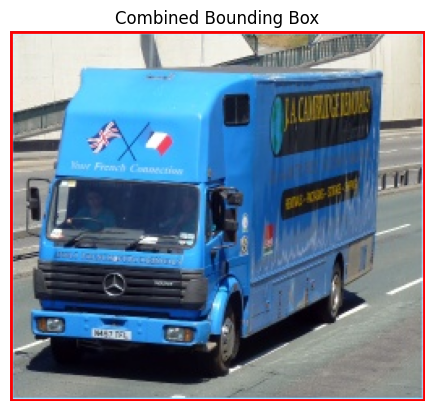

In [140]:
# Plot the image
plt.imshow(img)
plt.axis('off')

# Draw the combined bounding box only if it is valid
if combined_bbox[2] > 0 and combined_bbox[3] > 0:
    rect = patches.Rectangle(combined_bbox[:2], combined_bbox[2], combined_bbox[3], linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
else:
    print("Invalid combined bounding box.")
plt.title('Combined Bounding Box')
plt.show()